In [1]:
import pandas as pd

In [3]:
from table_evaluator import TableEvaluator

In [47]:
variables = ['sex','age','agegr','placesize','edu','socprof','marital','ls','depress','trust','trustfam','trustneigh','sport','nofriend','smoke','alcabuse','alcsol','wkabint','englang','height','weight','bmi']
original = pd.read_csv('df_original.csv', names = variables)
sample = pd.read_csv('df1_sample.csv', names = variables)
cart = pd.read_csv('df1_cart.csv', names = variables)
ctree = pd.read_csv('df1_ctree.csv', names = variables)
parametric = pd.read_csv('df1_parametric.csv', names = variables)
rf = pd.read_csv('df1_rf.csv', names = variables)
bag = pd.read_csv('df1_bag.csv', names = variables)
ctgan = pd.read_csv('ctgan.csv', names = variables, header = 0)

In [48]:
ctgan.head()

,sex,age,agegr,placesize,edu,socprof,marital,ls,depress,trust,...,sport,nofriend,smoke,alcabuse,alcsol,wkabint,englang,height,weight,bmi
0,MALE,16,35-44,"URBAN 20,000-100,000",POST-SECONDARY OR HIGHER,EMPLOYED IN PUBLIC SECTOR,MARRIED,PLEASED,4,IT`S DIFFICULT TO TELL,...,NO,2,NO,NO,NO,NO,NONE,171,150,29.527196
1,FEMALE,16,16-24,RURAL AREAS,SECONDARY,EMPLOYED IN PUBLIC SECTOR,SINGLE,MOSTLY SATISFIED,0,ONE CAN`T BE TOO CAREFUL,...,NO,10,NO,NO,NO,NO,PASSIVE,164,65,15.659759
2,MALE,19,16-24,"URBAN 500,000 AND OVER",POST-SECONDARY OR HIGHER,OTHER ECONOMICALLY INACTIVE,SINGLE,MOSTLY SATISFIED,0,ONE CAN`T BE TOO CAREFUL,...,YES,5,NO,NO,NO,NO,ACTIVE,165,71,24.551907
3,MALE,35,16-24,RURAL AREAS,SECONDARY,UNEMPLOYED,MARRIED,PLEASED,4,ONE CAN`T BE TOO CAREFUL,...,NO,19,NO,NO,NO,NO,ACTIVE,164,57,27.936550
4,MALE,49,45-59,RURAL AREAS,VOCATIONAL/GRAMMAR,EMPLOYED IN PRIVATE SECTOR,MARRIED,MOSTLY SATISFIED,4,ONE CAN`T BE TOO CAREFUL,...,YES,4,YES,YES,NO,NO,NONE,176,110,27.647459


In [13]:
fac = ['sex','agegr','placesize','edu','socprof','marital','ls','trust','trustfam','trustneigh','sport','smoke','alcabuse','alcsol','wkabint','englang']

In [49]:
evaluator_cart = TableEvaluator(original, cart, cat_cols = fac)
evaluator_ctree = TableEvaluator(original, ctree, cat_cols = fac)
evaluator_parametric = TableEvaluator(original, parametric, cat_cols = fac)
evaluator_rf = TableEvaluator(original, rf, cat_cols = fac)
evaluator_bag = TableEvaluator(original, bag, cat_cols = fac)
evaluator_sample = TableEvaluator(original, sample, cat_cols = fac)
evaluator_ctgan = TableEvaluator(original, ctgan, cat_cols = fac)

In [50]:
import numpy as np

def get_statistics(dataframe):
    stats_list = []
    
    for column in dataframe.columns:
        if np.issubdtype(dataframe[column].dtype, np.number):
            stats = {
                'variable': column,
                'type': 'numeric',
                'min': dataframe[column].min(),
                'max': dataframe[column].max(),
                'med': dataframe[column].median(),
                'moy': dataframe[column].mean(),
                'std': dataframe[column].std(),
                'cv': dataframe[column].std() / dataframe[column].mean() if dataframe[column].mean() != 0 else np.nan,
                'q025': dataframe[column].quantile(0.025),
                'q1': dataframe[column].quantile(0.25),
                'q3': dataframe[column].quantile(0.75),
                'q975': dataframe[column].quantile(0.975)
            }
        else:
            value_counts = dataframe[column].value_counts()
            stats = {
                'variable': column,
                'type': 'categorical',
                'num_mod': value_counts.size,
                'plus_freq': value_counts.idxmax(),
                'plus_freq_nb': value_counts.max(),
                'moins_freq': value_counts.idxmin(),
                'moins_freq_nb': value_counts.min()
            }
        
        stats_list.append(stats)
    
    stats_df = pd.DataFrame(stats_list)
    return stats_df

print(get_statistics(ctgan))

      variable         type  num_mod                 plus_freq  plus_freq_nb  \
0          sex  categorical      2.0                    FEMALE        2383.0   
1          age      numeric      NaN                       NaN           NaN   
2        agegr  categorical      6.0                     45-59        1175.0   
3    placesize  categorical      6.0               RURAL AREAS        2760.0   
4          edu  categorical      4.0        VOCATIONAL/GRAMMAR        1956.0   
5      socprof  categorical      9.0                   RETIRED        1022.0   
6      marital  categorical      6.0                   MARRIED        2249.0   
7           ls  categorical      7.0          MOSTLY SATISFIED        1813.0   
8      depress      numeric      NaN                       NaN           NaN   
9        trust  categorical      3.0  ONE CAN`T BE TOO CAREFUL        3651.0   
10    trustfam  categorical      3.0                       YES        4060.0   
11  trustneigh  categorical      3.0    

In [40]:
ctgan.head()

,sex,age,agegr,placesize,edu,socprof,marital,ls,depress,trust,...,sport,nofriend,smoke,alcabuse,alcsol,wkabint,englang,height,weight,bmi
NaN,sex,age,agegr,placesize,edu,socprof,marital,ls,depress,trust,...,sport,nofriend,smoke,alcabuse,alcsol,wkabint,englang,height,weight,bmi
0.0,MALE,16,35-44,"URBAN 20,000-100,000",POST-SECONDARY OR HIGHER,EMPLOYED IN PUBLIC SECTOR,MARRIED,PLEASED,4,IT`S DIFFICULT TO TELL,...,NO,2,NO,NO,NO,NO,NONE,171,150,29.527196331028193
1.0,FEMALE,16,16-24,RURAL AREAS,SECONDARY,EMPLOYED IN PUBLIC SECTOR,SINGLE,MOSTLY SATISFIED,0,ONE CAN`T BE TOO CAREFUL,...,NO,10,NO,NO,NO,NO,PASSIVE,164,65,15.659758861129216
2.0,MALE,19,16-24,"URBAN 500,000 AND OVER",POST-SECONDARY OR HIGHER,OTHER ECONOMICALLY INACTIVE,SINGLE,MOSTLY SATISFIED,0,ONE CAN`T BE TOO CAREFUL,...,YES,5,NO,NO,NO,NO,ACTIVE,165,71,24.551907430319005
3.0,MALE,35,16-24,RURAL AREAS,SECONDARY,UNEMPLOYED,MARRIED,PLEASED,4,ONE CAN`T BE TOO CAREFUL,...,NO,19,NO,NO,NO,NO,ACTIVE,164,57,27.936549730488544


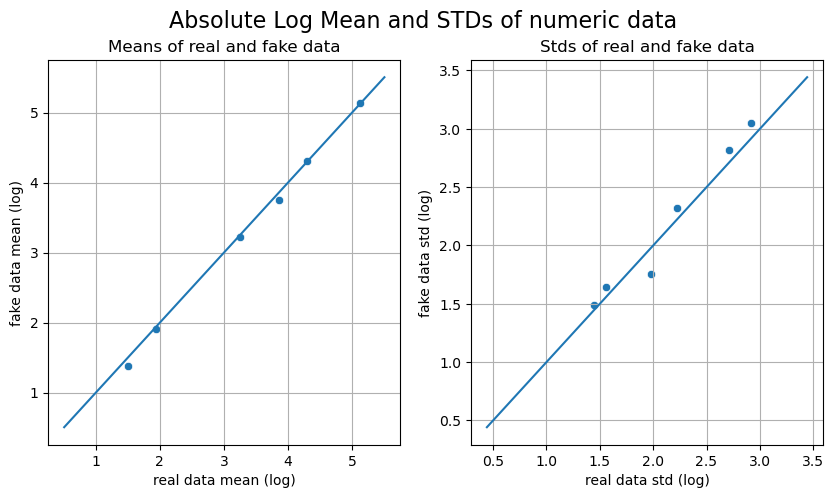

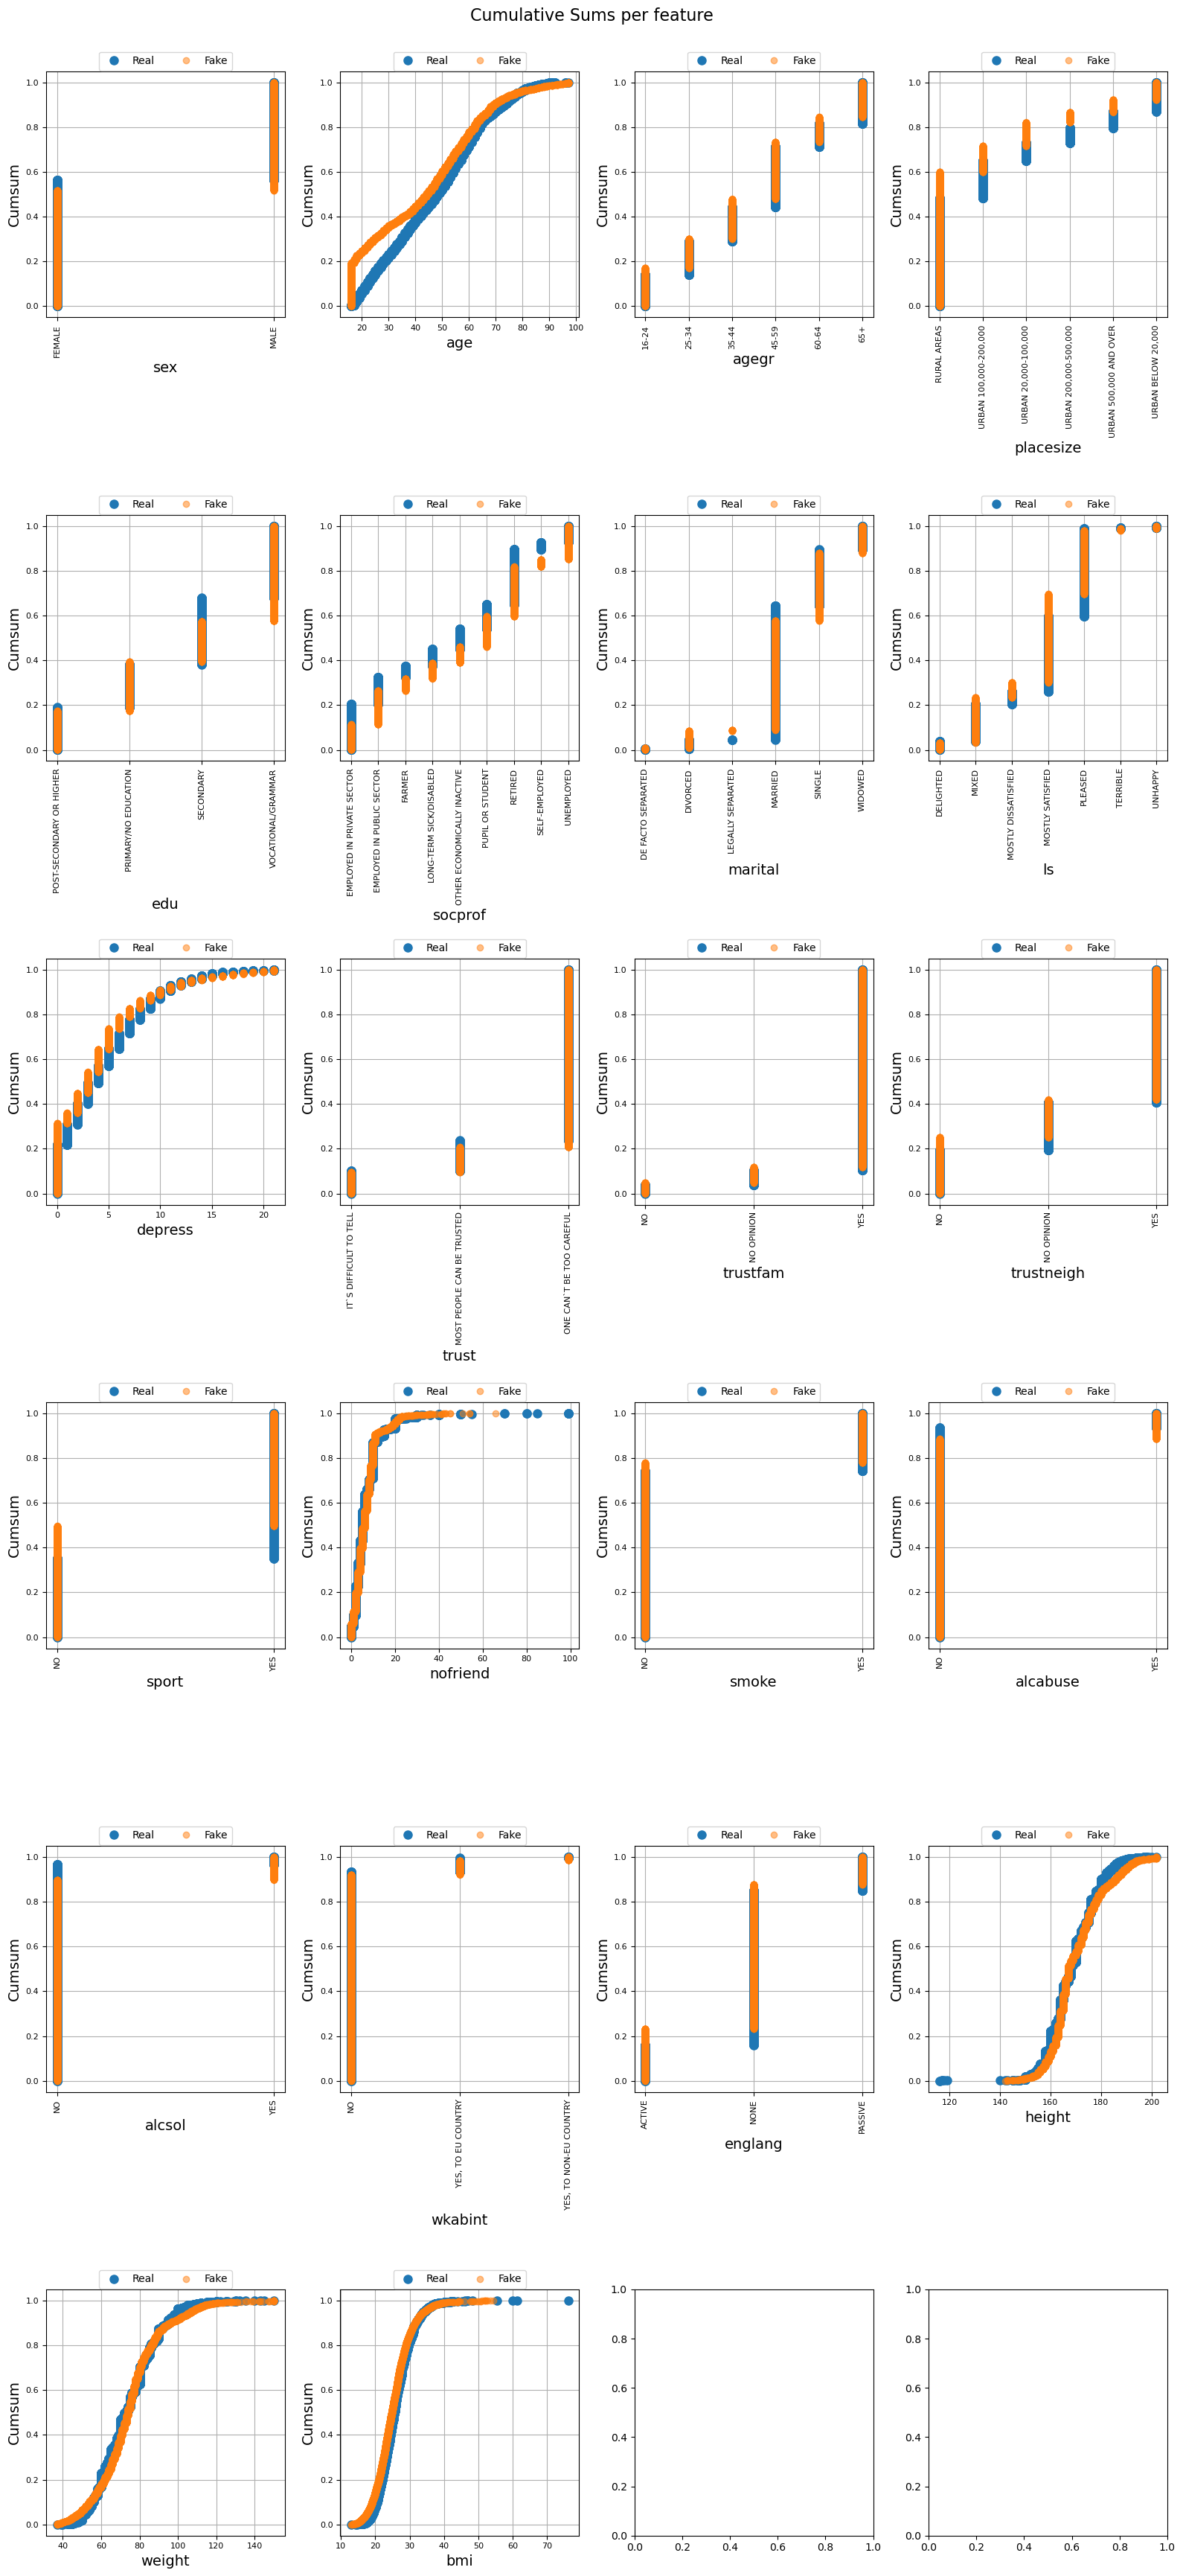

/opt/mamba/lib/python3.12/site-packages/table_evaluator/table_evaluator.py:182: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(axes[i].get_xticklabels(), rotation='vertical')
/opt/mamba/lib/python3.12/site-packages/table_evaluator/table_evaluator.py:182: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(axes[i].get_xticklabels(), rotation='vertical')
/opt/mamba/lib/python3.12/site-packages/table_evaluator/table_evaluator.py:182: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(axes[i].get_xticklabels(), rotation='vertical')
/opt/mamba/lib/python3.12/site-packages/table_evaluator/table_evaluator.py:182: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. afte

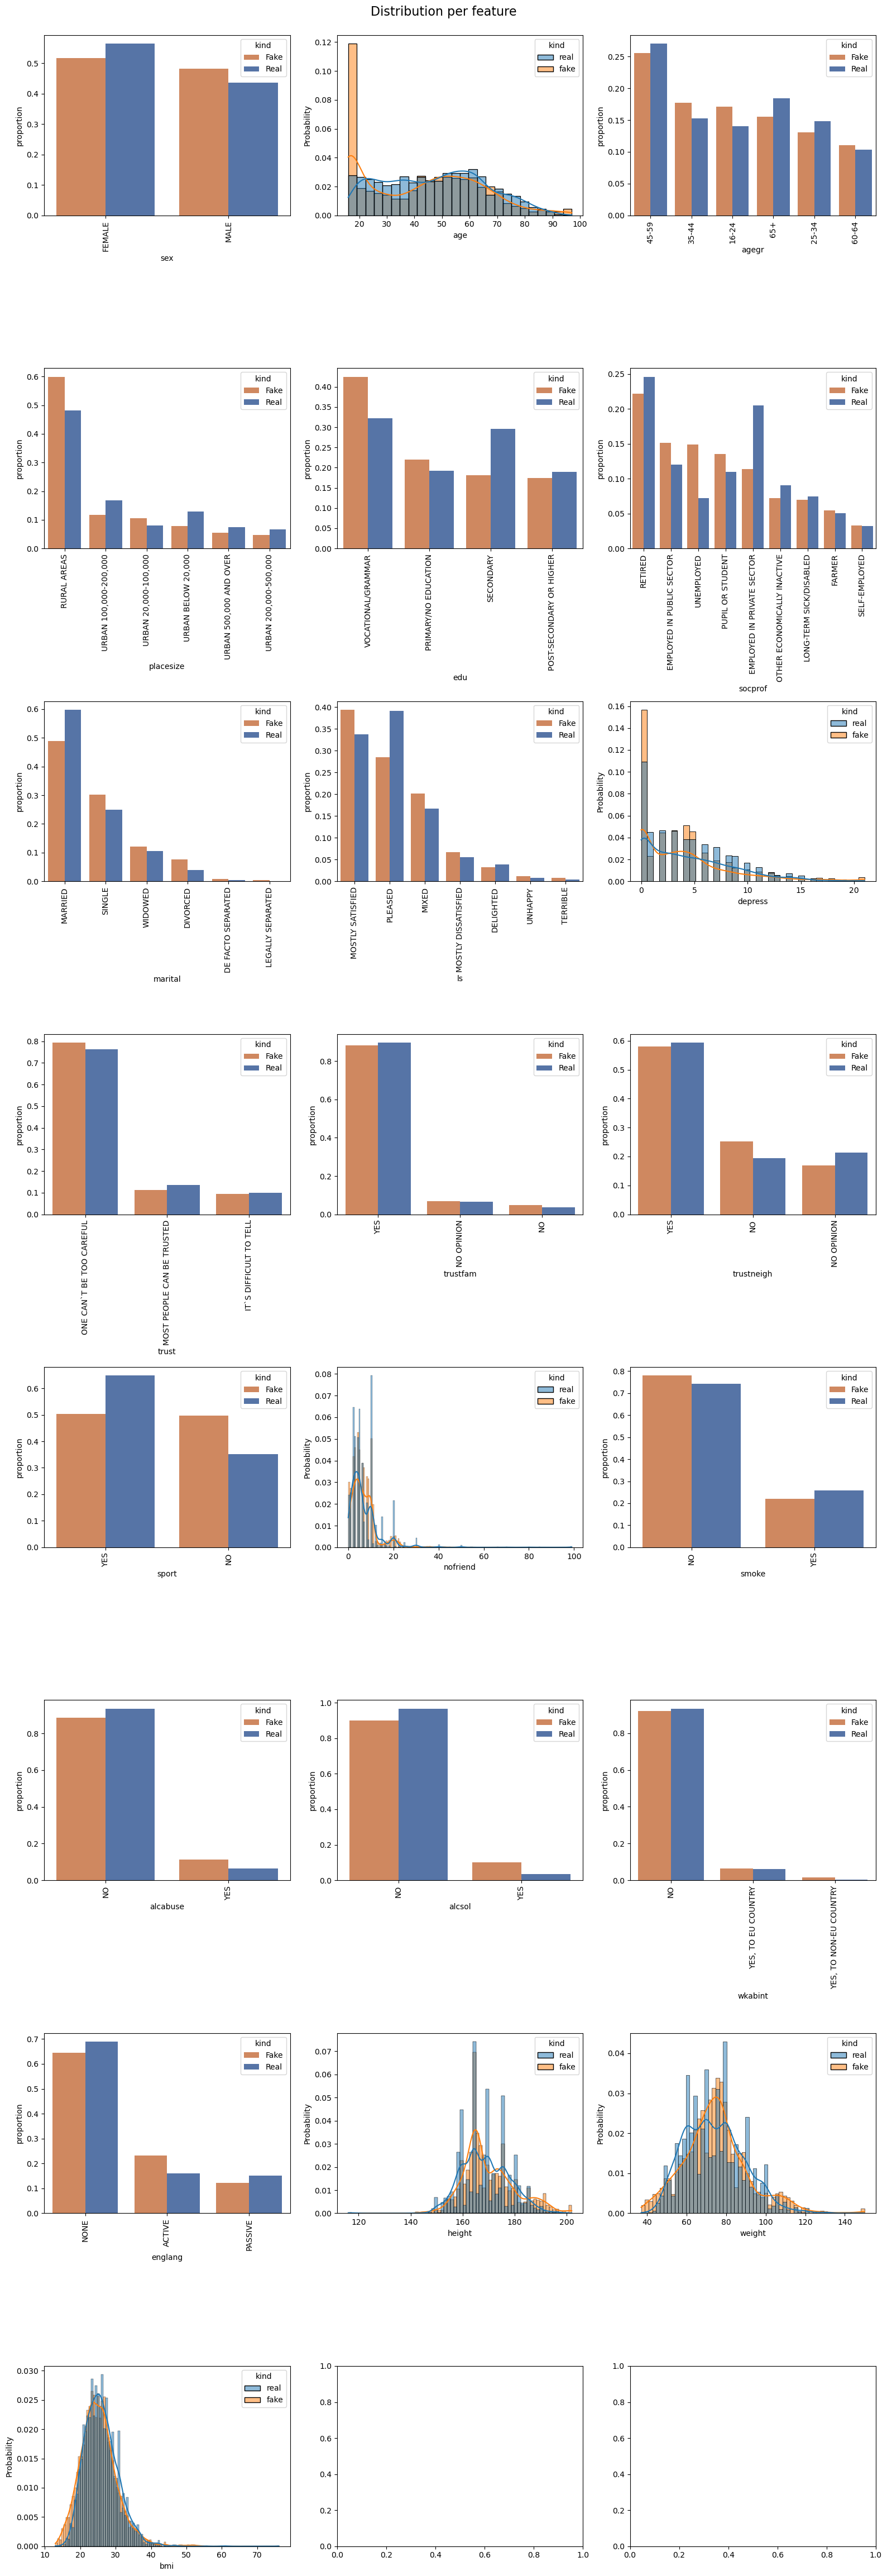

/opt/mamba/lib/python3.12/site-packages/dython/nominal.py:704: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  inf_nan.loc[columns[i], columns[j]] = _inf_nan_str(ij)
/opt/mamba/lib/python3.12/site-packages/dython/nominal.py:705: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  inf_nan.loc[columns[j], columns[i]] = _inf_nan_str(ji)
/opt/mamba/lib/python3.12/site-packages/dython/nominal.py:704: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  inf_nan.loc[columns[i], columns[j]]

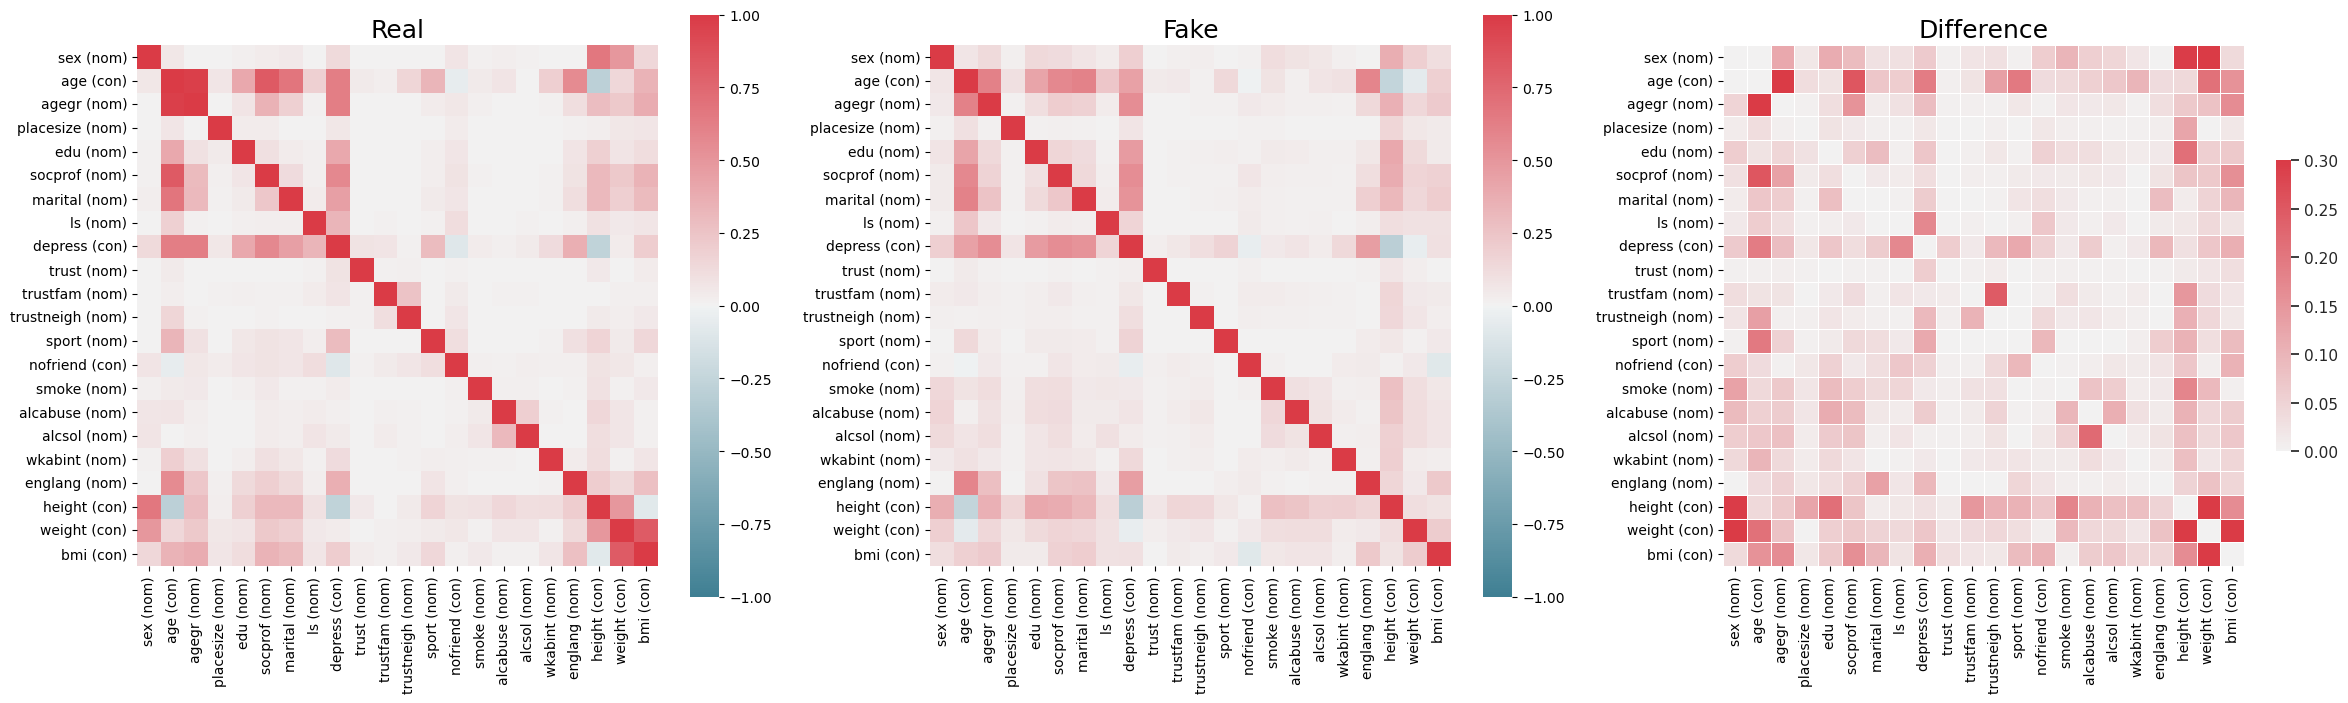

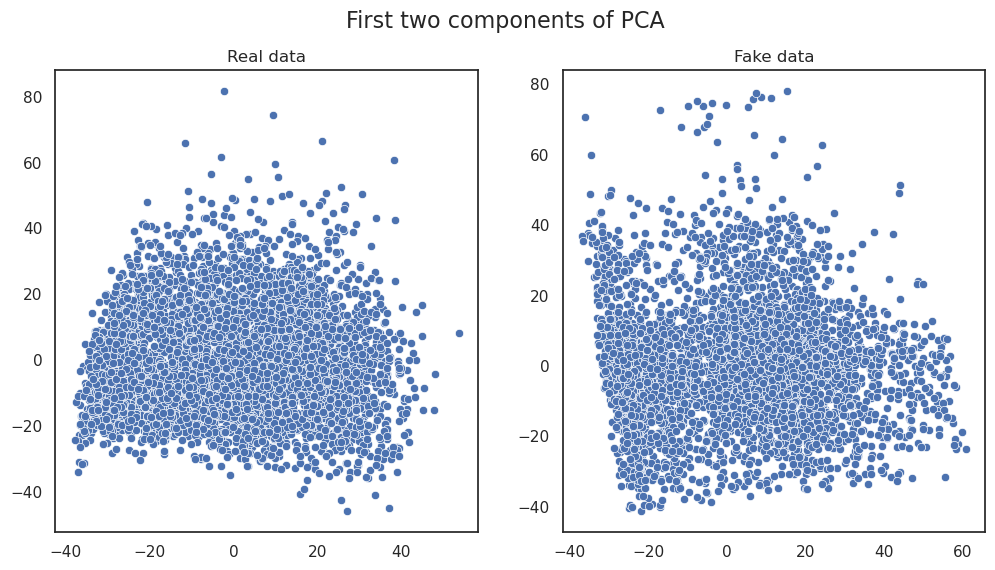

In [51]:
#evaluator_cart.visual_evaluation()
#evaluator_ctree.visual_evaluation()
#evaluator_parametric.visual_evaluation()
#evaluator_rf.visual_evaluation()
#evaluator_bag.visual_evaluation()
#evaluator_sample.visual_evaluation()
evaluator_ctgan.visual_evaluation()

Les deux premiers graphiques représentent les logarithmes absolu de la moyenne et de l'écart-type de chaque variables numériques.

Matrice corrélations :
- Continue - Continue : utilise le coefficient de corrélation de Pearson $\frac{\sum(x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum(x_i - \bar{x})^2\sum(y_i -\bar{y})^2}} \in [-1,1]$
- Continue - Catégorielle : utilise le rapport de corrélation $\eta^2(y,x) = \frac{SCE_{inter}}{SCE_{intra}} \in [0,1]$ avec $SCE_{intra} = \sum_j\sum_{i \in J_j}(y_{ij} - \bar{y}_{.j})^2$ qui est la variabilité intra-classe et $SCE_{inter} = \sum_j\sum_{i \in J_j}(\bar{y}_{.j} - \bar{y})^2$ qui est la variabilité inter-classe
- Catégorielle - Catégorielle : utilise le U de Theil, une métrique de corrélation asymétrique pour les associations catégorielles défini par $U(X|Y) = \frac{H(X) - H(X|Y)}{H(X)} \in [0,1]$ avec $H(X) = -\sum_x P_X(x)\log P_X(x)$ et $H(X|Y) = -\sum_{x,y}P_{X,Y}(x,y)\log P_{X|Y}(x|y)$

Cart : 
- Les moyennes et écarts types des variables numériques sont très proches après transformation logarithmique.
- Les corrélations entre variables sont bien reproduites dans les données synthétiques.
- La structure globale des données, telle que capturée par les deux premières composantes principales, est conservée dans les données synthétiques.

Ctree : Pareil

Parametric : 
- On constate une différence dans la variabilité des variables numériques entre les données originales et les données synthétiques.
- On apperçoit également dans la matrice des différences des cases plus foncées indiquant une plus grande différence dans les corrélations
- Les individus ont une représentation différente dans le premier plan factoriel
- Le modèle parametric est globalement moins bon que cart et ctree.

Rf :
- Plus grandes différences dans les effectifs de chaque variables par rapport aux autres modèles
- Il y a une assez grande différence dans les corrélations concernant la variable depress

Bag :
- Quelques différences au niveau des effectifs de cretaines variables

Sample :
- Est assez bon jusqu'à ce qu'on arrive aux corrélations qui sont catastrophiques tout comme la représentation dans le premier plan factoriel 

In [42]:
evaluator.evaluate(target_col = 'sex')

/opt/mamba/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/mamba/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


BrokenProcessPool: A task has failed to un-serialize. Please ensure that the arguments of the function are all picklable.